# 테스트 코드

In [191]:
import requests
from bs4 import BeautifulSoup

url = "https://www.federalreserve.gov/fomc/minutes/20060629.htm"
selector = "table > tr > td"

html = requests.get(url)
soup = BeautifulSoup(html.text, "lxml")
txt = soup.select(selector)


In [193]:
print(txt)

[<td colspan="2" width="650">
<font size="+2">Minutes of the Federal Open Market Committee</font>
<br/>
<font size="+1">June 28-29, 2006</font>
<p>A meeting of the Federal Open Market Committee was held in the offices of the Board of Governors of the Federal Reserve System in Washington, D.C., on Wednesday, June 28, 2006 at 2:00 p.m. and continued on Thursday, June 29, 2006 at 9:00 a.m.

</p></td>, <td width="600">
<strong>Present:</strong>
</td>, <td width="30"></td>, <td valign="top" width="250">

Mr. Bernanke, Chairman<br/>
Mr. Geithner, Vice Chairman<br/>
Ms. Bies<br/>
Mr. Guynn<br/>
Mr. Kohn<br/>
Mr. Kroszner<br/>
Mr. Lacker<br/>
Ms. Pianalto<br/>
Mr. Warsh<br/>
Ms. Yellen<br/>
</td>, <td align="left" valign="top">
</td>, <td width="30"></td>, <td colspan="4" width="550">
<p>Ms. Minehan, Messrs. Moskow, Poole, and Hoenig,
       Alternate Members of the Federal Open Market Committee

</p>
<p>Messrs. Fisher and Stern, Presidents of the Federal Reserve 
Banks of Dallas and Minneapol

In [192]:
print(txt[7].text)


By unanimous vote, the Committee approved a "Report and Plan of the Federal Open Market Committee to Improve FOIA Operations" and approved a delegation of authority to the Chairman (or his designee) to take actions required under the Freedom of Information Act.  

The Manager of the System Open Market Account reported on recent developments in foreign exchange markets.  There were no open market operations in foreign currencies for the System's account in the period since the previous meeting.  The Manager also reported on developments in domestic financial markets and on System open market transactions in government securities and federal agency obligations during the period since the previous meeting.  By unanimous vote, the Committee ratified these transactions.  

The information reviewed at the June meeting suggested that the growth of economic activity in the second quarter slowed substantially from its rapid first-quarter pace.  The expansion of consumer spending softened, and 

In [38]:
url = "https://www.federalreserve.gov/fomc/minutes/20041110.htm"
selector = "table > tr > td"

html = requests.get(url)
soup = BeautifulSoup(html.text, "lxml")
txt = soup.select(selector)


In [42]:
print(txt[7].text)


By unanimous vote, the minutes of the meeting of the Federal Open Market Committee held on September 21, 2004, were approved.
By unanimous vote, the Federal Open Market Committee approved the selection of Deborah J. Danker as Deputy Secretary of the Committee to serve until the selection of a successor at the first regularly scheduled meeting after December 31, 2004.
The Manager of the System Open Market Account reported on recent developments in foreign exchange markets.  There were no open market operations in foreign currencies for the Systemï¿½s account in the period since the previous meeting.
The Manager reported on recent developments in domestic financial markets and on System open market transactions in government securities and securities issued or fully guaranteed by federal agencies during the period September 21, 2004, through November 9, 2004.  By unanimous vote, the Committee ratified these transactions.
The Manager also discussed the pressures on the federal funds rate

# 크롤링

In [213]:
import requests
from bs4 import BeautifulSoup

def FOMC_crawling(date):
    """
    FOMC 회의록을 크롤링하는 함수
    
    Args(str): 회의 일자
    
    Returns(str): 회의록 본문 텍스트 데이터

    """
    #-------------FOMC 회의록 크롤링-------------#
    
    url = f"https://www.federalreserve.gov/monetarypolicy/fomcminutes{date}.htm"
    
    if int(date[:4]) > 2011:
        selector = "#article"
        encoding = "UTF-8"
        index = 0
    else:
        selector = "#leftText"
        encoding = "ISO-8859-1"
        index = 0

    html = requests.get(url)
    html.encoding = encoding  # 글자 깨짐 방지
    soup = BeautifulSoup(html.text, "lxml")
    txt = soup.select(selector)[index].text
    
    #-----상한선과 하한선 설정 후 그 사이에 있는 텍스트만 추출-----#
    
    upper_line = "Developments in Financial Markets and Open Market Operations"
    upper_line2 = "Discussion of Financial Markets and Open Market Operations"
    upper_line3 = "AUTHORIZATION FOR DOMESTIC OPEN MARKET OPERATIONS" 
    upper_line4 = "Developments in Financial Markets, Open Market Operations, and Policy Normalization"
    upper_line5 = "Developments in Financial Markets and the Federal Reserve's Balance Sheet"
    upper_line6 = "The Manager of the System Open Market Account reported on recent developments in foreign exchange markets."
    lower_line = "_______________________"

    if upper_line in txt: 
        main_txt = upper_line + txt.split(upper_line)[1]
    elif upper_line2 in txt: 
        main_txt = upper_line2 + txt.split(upper_line2)[1]
    elif upper_line3 in txt: 
        main_txt = upper_line3 + txt.split(upper_line3)[1]
    elif upper_line4 in txt: 
        main_txt = upper_line4 + txt.split(upper_line4)[1]
    elif upper_line5 in txt: 
        main_txt = upper_line5 + txt.split(upper_line5)[1]
    else:
        main_txt = upper_line6 + txt.split(upper_line6)[1]

    main_txt2 = main_txt.split(lower_line)[0]

    return main_txt2

if __name__ == "__main__":
    test_txt = FOMC_crawling("20080805")
    print(test_txt)

The Manager of the System Open Market Account reported on recent developments in foreign exchange markets. There were no open market operations in foreign currencies for the System's account in the period since the previous meeting. The Manager also reported on developments in domestic financial markets and on System open market operations in government securities and federal agency obligations during the period since the previous meeting. By unanimous vote, the Committee ratified these transactions.
The information reviewed at the August meeting indicated that the economy expanded at a moderate pace in the second quarter, but recent financial market developments highlighted some of the stresses that the economy faced going forward. Both consumer and business spending recorded gains in the second quarter, and net exports contributed importantly to the rise in real gross domestic product (GDP). However, residential construction continued to fall sharply, the labor market weakened furthe

In [214]:
# 회의 날짜 -> 각각의 url 코드에 사용
meeting_dates = ["20231213", "20231101", "20230920", "20230726", "20230614", 
                 "20230503", "20230322", "20230201", "20221214", "20221102",
                 "20220921", "20220727", "20220615", "20220504", "20220316",
                 "20220126", "20211215", "20211103", "20210922", "20210728",
                 "20210616", "20210428", "20210317", "20210127", "20201216",
                 "20201105", "20200916", "20200729", "20200610", "20200429",
                 "20200315", "20200129", "20191211", "20191030", "20190918",
                 "20190731", "20190619", "20190501", "20190320", "20190130", # test 40부터 테스트
                 "20181219", "20181108", "20180926", "20180801", "20180613",
                 "20180502", "20180321", "20180131", "20171213", "20171101",
                 "20170920", "20170726", "20170614", "20170503", "20170315",
                 "20170201", "20161214", "20161102", "20160921", "20160727",
                 "20160615", "20160427", "20160316", "20160127", "20151216",
                 "20151028", "20150917", "20150729", "20150617", "20150429", # 65부터 테스트
                 "20150318", "20150128", "20141217", "20141029", "20140917",
                 "20140730", "20140618", "20140430", "20140319", "20140129",
                 "20131218", "20131030", "20130918", "20130731", "20130619",
                 "20130501", "20130320", "20130130", "20121212", "20121024",
                 "20120913", "20120801", "20120620", "20120425", "20120313",
                 "20120125", "20111213", "20111102", "20110921", "20110809", # 20 x 5
                 "20110622", "20110427", "20110315", "20110126", "20101214",
                 "20101103", "20100921", "20100810", "20100623", "20100428",
                 "20100316", "20100127", "20091216", "20091104", "20090923",
                 "20090812", "20090624", "20090429", "20090318", "20090128",
                 "20081216", "20081029", "20080916", "20080805"] # 24 x 5

print(len(meeting_dates))

124


In [216]:
# 리스트에 각각의 문서의 본문 텍스트 데이터 저장
from tqdm.notebook import tqdm

doc_lst = []
for date in tqdm(meeting_dates):
#     print(date)
    txt = FOMC_crawling(date)
    doc_lst.append(txt)


  0%|          | 0/124 [00:00<?, ?it/s]

# 토큰화

In [217]:
from nltk.tokenize import sent_tokenize, word_tokenize

def FOMC_tokenize(doc):
    """
    문서 내의 텍스트를 토큰화하는 함수
    
    Args: 
        doc(str): 회의록 본문 텍스트 데이터
    
    Returns:
        word_tokens1(list): 문장 단위로 토큰화 된 2차원 리스트 -> 문장 벡터를 생성하기 위함
        word_tokens2(list): 문서 단위로 토큰화 된 1차원 리스트 -> 문서 벡터를 생성하기 위함
    """
    
    #-------------문장 토큰화-------------#
    sent_tokens = sent_tokenize(doc)
    
    
    #-------------단어 토큰화-------------#
    
    # 문장 단위로 구분된 토큰 (2차원 리스트)
    tokenize_by_sent = [word_tokenize(sentence) for sentence in sent_tokens]
    
    # 문서 단위로 구분된 토큰 (1차원 리스트)
    tokenize_by_doc = word_tokenize(doc)
    
    return tokenize_by_sent, tokenize_by_doc

if __name__ == "__main__":
    tokenize_by_sent, tokenize_by_doc = FOMC_tokenize(doc_lst[0])
    print(tokenize_by_sent[:3]) # 문장 단위로 구분 (2차원 리스트)
    print(tokenize_by_doc[:72]) # 문서 단위로 구분 (1차원 리스트)
    

[['Developments', 'in', 'Financial', 'Markets', 'and', 'Open', 'Market', 'Operations', 'The', 'manager', 'turned', 'first', 'to', 'a', 'review', 'of', 'developments', 'in', 'financial', 'markets', 'over', 'the', 'intermeeting', 'period', '.'], ['Financial', 'conditions', 'eased', ',', 'driven', 'by', 'a', 'decline', 'in', 'interest', 'rates', ',', 'an', 'increase', 'in', 'equity', 'prices', ',', 'and', 'a', 'depreciation', 'in', 'the', 'dollar', '.'], ['The', 'rise', 'in', 'equity', 'prices', 'was', 'supported', 'by', 'the', 'decline', 'in', 'Treasury', 'yields', 'and', 'by', 'earnings', 'growth', 'that', 'exceeded', 'consensus', 'expectations', '.']]
['Developments', 'in', 'Financial', 'Markets', 'and', 'Open', 'Market', 'Operations', 'The', 'manager', 'turned', 'first', 'to', 'a', 'review', 'of', 'developments', 'in', 'financial', 'markets', 'over', 'the', 'intermeeting', 'period', '.', 'Financial', 'conditions', 'eased', ',', 'driven', 'by', 'a', 'decline', 'in', 'interest', 'rates'

In [218]:
# 리스트에 각각의 문서의 토큰화된 본문 텍스트 데이터 저장

tokenized_sent_lst = [] # 문서별, 문장별로 저장된 3차원 리스트
tokenized_doc_lst = [] # 문서별로 저장된 2차원 리스트

for doc in tqdm(doc_lst):
    tokenize_by_sent, tokenize_by_doc = FOMC_tokenize(doc)
    tokenized_sent_lst.append(tokenize_by_sent)
    tokenized_doc_lst.append(tokenize_by_doc)
    

  0%|          | 0/124 [00:00<?, ?it/s]

In [219]:
import itertools

# 문장 단위로 저장된 2차원 데이터
sentence_tokens = list(itertools.chain(*tokenized_sent_lst))
# 단어 단위로 저장된 1차원 데이터
word_tokens = list(itertools.chain(*sentence_tokens))

print(tokenized_sent_lst[0][:2])
print("------------------------------------------------------------")
print("문서 개수:", len(tokenized_doc_lst))
print("문장 개수:", len(sentence_tokens))
print("단어 개수:", len(word_tokens))


[['Developments', 'in', 'Financial', 'Markets', 'and', 'Open', 'Market', 'Operations', 'The', 'manager', 'turned', 'first', 'to', 'a', 'review', 'of', 'developments', 'in', 'financial', 'markets', 'over', 'the', 'intermeeting', 'period', '.'], ['Financial', 'conditions', 'eased', ',', 'driven', 'by', 'a', 'decline', 'in', 'interest', 'rates', ',', 'an', 'increase', 'in', 'equity', 'prices', ',', 'and', 'a', 'depreciation', 'in', 'the', 'dollar', '.']]
------------------------------------------------------------
문서 개수: 124
문장 개수: 32409
단어 개수: 998560


# Word2Vec

In [220]:
from gensim.models import Word2Vec

sent_model = Word2Vec(sentence_tokens, vector_size=500, window=5, min_count=5, workers=4) # 문장 단위 모델
doc_model = Word2Vec(tokenized_doc_lst, vector_size=500, window=5, min_count=5, workers=4) # 문서 단위 모델

In [222]:
# 임베딩된 단어 벡터 추출
word_vectors = doc_model.wv

# 모델에 포함된 모든 단어들을 얻기
words = list(word_vectors.key_to_index.keys())

# 단어들 출력
print(words[:20])
print(len(words))

['the', ',', '.', 'of', 'in', 'and', 'to', 'that', 'a', 'for', 'on', 'inflation', 'Committee', 'as', 'The', 'was', 'rate', 'at', 'economic', 'with']
4901


In [224]:
# 임베딩된 단어 벡터를 얻기
word_vectors = doc_model.wv

# 특정 단어에 대한 벡터를 가져오기
print(word_vectors['inflation'][:20])

# 비슷한 단어 찾기
print(word_vectors.most_similar('inflation'))

[-0.46164727  0.87351286 -0.6542043   1.3304758   0.4720669  -1.1028249
  0.8449648   0.88488185 -1.1573824   0.0964814  -0.04085987 -0.8689491
  0.6892839  -0.49448305  1.4316794   0.93603504  0.6331549  -0.29573837
  0.906265    1.0078995 ]
[('objective', 0.5574080944061279), ('longer-run', 0.5505518913269043), ('Inflation', 0.4906763732433319), ('inflationary', 0.4807800352573395), ('core', 0.4707399010658264), ('remain', 0.46974536776542664), ('run', 0.46070221066474915), ('running', 0.4567174017429352), ('market-based', 0.4540000259876251), ('stable', 0.45315641164779663)]


# 문서 벡터 생성

In [225]:
def cal_doc_vec(doc_num):
    """
    문서 벡터를 생성하는 함수
    
    Args:
        doc_num(int): 문서의 번호
        
    Returns:
        doc_vec(list): 문서 벡터
    """
    #----------------문서 벡터 생성----------------#
    
    # 문서 내 단어 벡터 리스트 
    word_vec = [doc_model.wv[word] for word in tokenized_doc_lst[doc_num] if word in doc_model.wv]
    
    # 합계를 통한 문서 벡터 생성
    doc_vec = sum(word_vec)
    
    return doc_vec
    

if __name__ == "__main__":
    doc_vec = cal_doc_vec(0)  # 0번 문서 벡터
    print(doc_vec[:24])
    

[  313.46777    739.6965     390.36163   1177.2948    -296.40155
 -1328.1779     200.87485   1003.7142     462.60498     64.90875
  -138.04012    672.0241     454.91992    293.85828    668.39777
   265.38474   -201.89992    -86.90049    558.0684      47.014675
  -746.1126    -120.259315  1560.2177      40.028965]


In [226]:
# 각각의 문서의 문서 벡터 리스트
doc_vec_lst = []

for i in tqdm(range(len(doc_lst))):
    doc_vec = cal_doc_vec(i)
    doc_vec_lst.append(doc_vec)
    

  0%|          | 0/124 [00:00<?, ?it/s]

In [227]:
# 0번 문서의 문서 벡터
print(doc_vec_lst[0][:30])

[  313.46777    739.6965     390.36163   1177.2948    -296.40155
 -1328.1779     200.87485   1003.7142     462.60498     64.90875
  -138.04012    672.0241     454.91992    293.85828    668.39777
   265.38474   -201.89992    -86.90049    558.0684      47.014675
  -746.1126    -120.259315  1560.2177      40.028965    10.349413
  -339.8554    1135.996      -30.717798  -380.4438    -147.99023 ]


# K-menas 기법을 활용한 문서 분류

In [228]:
from sklearn.metrics.pairwise import cosine_similarity

# 0번 문서와 1번 문서의 비교
similarity = cosine_similarity(doc_vec_lst)
print("#-----------------------각각의 문서간의 코사인 유사도-----------------------#\n\n", similarity)


#-----------------------각각의 문서간의 코사인 유사도-----------------------#

 [[1.         0.9896666  0.99673665 ... 0.9000199  0.89921796 0.9320202 ]
 [0.9896666  1.         0.99118716 ... 0.91945124 0.9162828  0.9449144 ]
 [0.99673665 0.99118716 1.         ... 0.8982242  0.90025914 0.93272555]
 ...
 [0.9000199  0.91945124 0.8982242  ... 1.         0.9505515  0.96200633]
 [0.89921796 0.9162828  0.90025914 ... 0.9505515  1.0000002  0.9895929 ]
 [0.9320202  0.9449144  0.93272555 ... 0.96200633 0.9895929  1.        ]]


In [229]:
from sklearn.cluster import KMeans

# K-평균 클러스터링 모델 초기화 (클러스터 개수는 예시로 2를 사용)
kmeans = KMeans(n_clusters=2, random_state=0)

# 클러스터링 수행
kmeans.fit(doc_vec_lst)

# 결과 출력
print("클러스터 레이블:\n", kmeans.labels_)


클러스터 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0]


# 클러스터링 결과 시각화

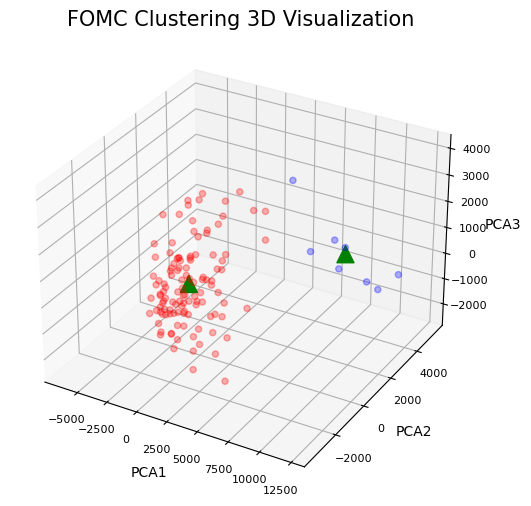

In [230]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.labels_  # 각각의 문서의 라벨
centers = kmeans.cluster_centers_  # 클러스터 중심점

# PCA를 이용하여 3차원으로 차원 축소
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(doc_vec_lst)
centers_reduced = pca.transform(centers)  # 중심점도 차원 축소

# 3D 플롯으로 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 라벨 크기를 8로 설정
ax.tick_params(labelsize=8) 


# 클러스터에 따라 다른 색상으로 표시
ax.scatter(X_reduced[labels == 0, 0], X_reduced[labels == 0, 1], X_reduced[labels == 0, 2], c='red', alpha=0.3)
ax.scatter(X_reduced[labels == 1, 0], X_reduced[labels == 1, 1], X_reduced[labels == 1, 2], c='blue', alpha=0.3)

# 중심점 시각화 (검은색 X 표시)
ax.scatter(centers_reduced[:, 0], centers_reduced[:, 1], centers_reduced[:, 2], c='green', marker='^', s=150, alpha=1.0)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("FOMC Clustering 3D Visualization", size=15)
plt.show()
